In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

In [2]:
x = ['which book is this', 'this is book and this is math']

In [3]:
cv=CountVectorizer()
count=cv.fit_transform(x)
count.toarray() #BOW

array([[0, 1, 1, 0, 1, 1],
       [1, 1, 2, 1, 2, 0]], dtype=int64)

In [4]:
cv.get_feature_names_out() 

array(['and', 'book', 'is', 'math', 'this', 'which'], dtype=object)

In [5]:
bow=pd.DataFrame(count.toarray(),columns=cv.get_feature_names_out())
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


#### Term frequency

In [6]:
bow.shape

(2, 6)

In [7]:
tf=bow.copy()
for index, row in enumerate(tf.iterrows()):
    for col in row[1].index:
        tf.loc[index,col]=tf.loc[index,col]/sum(row[1].values)

In [8]:
tf

,and,book,is,math,this,which
0,0.000000,0.250000,0.250000,0.000000,0.250000,0.25
1,0.142857,0.142857,0.285714,0.142857,0.285714,0.00


In [9]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


In [10]:
bb=bow.astype("bool")
bb

,and,book,is,math,this,which
0,False,True,True,False,True,True
1,True,True,True,True,True,False


In [11]:
bb["and"].sum()

1

In [12]:
cols=bb.columns
cols

Index(['and', 'book', 'is', 'math', 'this', 'which'], dtype='object')

In [13]:
nz=[]
for col in cols:
    nz.append(bb[col].sum())
nz

[1, 2, 2, 1, 2, 1]

In [14]:
bb.shape

(2, 6)

In [15]:
idf=[]
N=bb.shape
for index,col in enumerate(cols):
    idf.append(np.log((bb.shape[0]+1)/(nz[index]+1))+1)
idf

[1.4054651081081644, 1.0, 1.0, 1.4054651081081644, 1.0, 1.4054651081081644]

In [16]:
x

['which book is this', 'this is book and this is math']

#### TFIDF
tf*idf

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
x

['which book is this', 'this is book and this is math']

In [19]:
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(x)
print( X.toarray() )

[[0.         0.44832087 0.44832087 0.         0.44832087 0.63009934]
 [0.39054766 0.27787788 0.55575576 0.39054766 0.55575576 0.        ]]


In [20]:
print(tfidf.idf_)

[1.40546511 1.         1.         1.40546511 1.         1.40546511]


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df=pd.read_csv("spam.tsv",sep="\t")
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [23]:
df.shape

(5572, 4)

In [24]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [25]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [26]:
df["label"].value_counts()
# Unbalanced dataset we have here
# we have to make it balanced dataset

ham     4825
spam     747
Name: label, dtype: int64

In [27]:
ham=df[df["label"]=="ham"]
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [28]:
spam=df[df["label"]=="spam"]
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [29]:
ham.shape , spam.shape

((4825, 4), (747, 4))

In [30]:
ham=ham.sample(spam.shape[0])

In [31]:
ham.shape , spam.shape

((747, 4), (747, 4))

In [32]:
# data=ham.append(spam,ignore_index=True)

In [33]:
data=pd.concat([ham,spam],ignore_index=True)
data.sample(5)

,label,message,length,punct
680,ham,3 pa but not selected.,22,1
325,ham,Dont worry. I guess he's busy.,30,3
1404,spam,Want the latest Video handset? 750 anytime any...,132,3
1453,spam,Natalja (25/F) is inviting you to be her frien...,136,12
290,ham,U coming 2 pick me?,19,1


In [34]:
data["label"].value_counts()

ham     747
spam    747
Name: label, dtype: int64

#### Exploratory Data Analysis

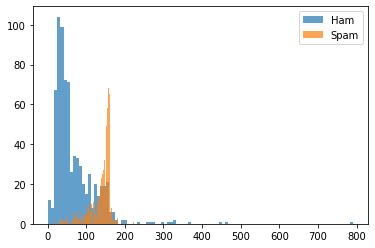

In [35]:
plt.hist(ham["length"],bins=100,alpha=0.7,label="Ham")
plt.hist(spam["length"],bins=100,alpha=0.7,label="Spam")
plt.legend()
plt.show()

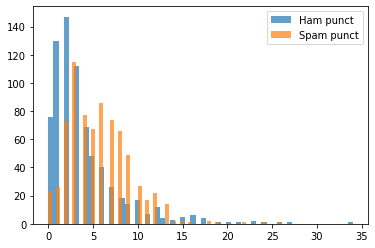

In [36]:
plt.hist(ham["punct"],bins=60,alpha=0.7,label="Ham punct")
plt.hist(spam["punct"],bins=60,alpha=0.7,label="Spam punct")
plt.legend()
plt.show()

#### Data preparation for Training

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
data.head()

,label,message,length,punct
0,ham,So now my dad is gonna call after he gets out ...,88,1
1,ham,You still coming tonight?,25,1
2,ham,Come to my home for one last time i wont do an...,63,2
3,ham,"To the wonderful Okors, have a great month. We...",101,3
4,ham,MY NO. IN LUTON 0125698789 RING ME IF UR AROUN...,51,3


In [39]:
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(data["message"])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
X=X.toarray()

In [41]:
X.shape
#4595 are the unique words in data["message"]

(1494, 4509)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,data["label"],test_size=0.2, random_state=42, stratify=data["label"])

In [43]:
X_train.shape, X_test.shape

((1195, 4509), (299, 4509))

In [44]:
y_train.shape, y_test.shape

((1195,), (299,))

### Train text classifier
#### Random Forest

In [45]:
clf=RandomForestClassifier(n_estimators=100,n_jobs=-1)

In [46]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [47]:
y_pred=clf.predict(X_test)

In [48]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[146   4]
 [ 14 135]]


In [49]:
print( classification_report(y_test,y_pred) )

              precision    recall  f1-score   support

         ham       0.91      0.97      0.94       150
        spam       0.97      0.91      0.94       149

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



#### SVM

In [50]:
clf=SVC(C=1500,gamma="auto")

In [51]:
clf.fit(X_train,y_train)

SVC(C=1500, gamma='auto')

In [52]:
y_pred=clf.predict(X_test)

In [53]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[146   4]
 [ 12 137]]


In [54]:
print( classification_report(y_test,y_pred) )

              precision    recall  f1-score   support

         ham       0.92      0.97      0.95       150
        spam       0.97      0.92      0.94       149

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



### Test model with Unseen Data - Real Data

In [55]:
clf

SVC(C=1500, gamma='auto')

In [56]:
def predict(x):
    x=tfidf.transform([x])
    x=x.toarray()
    prediction = clf.predict(x)
    return prediction

In [57]:
predict('what are you doing?')

array(['ham'], dtype=object)

In [58]:
predict('Do you want to win a free ticket ?')

array(['ham'], dtype=object)

In [59]:
predict('Can ı make an offer to you?')

array(['ham'], dtype=object)